In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

olympics_df = pd.read_csv("./results/olympics_refined.csv")
results_df = pd.read_csv("./results/results_cleaned.csv")

merged_df = pd.merge(olympics_df, results_df, on="athlete_id", how="inner")

merged_df = merged_df.drop(columns=['As', 'Nationality', 'NOC_y', 'Team', 'born_region'])
merged_df = merged_df.rename(columns={"NOC_x": "NOC"})
merged_df = merged_df.dropna(subset=['height_cm', 'weight_kg'])

merged_df.to_csv("./results/merged_olympics_results.csv", index=False)

merged_df.head(10)

C:\Users\User\AppData\Local\Temp\ipykernel_29728\3326158648.py:8: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  results_df = pd.read_csv("./results/results_cleaned.csv")


,athlete_id,name,Sex,birth_year,born_city,born_country,NOC,height_cm,weight_kg,death_year,Event,Discipline,Year,Season,Medal,position,tied
5,2,Arnaud Boetsch,Male,1969.0,Meulan,FRA,France,183.0,76.0,NaN,"Singles, Men",Tennis,1996.0,Summer,NaN,17.0,True
6,2,Arnaud Boetsch,Male,1969.0,Meulan,FRA,France,183.0,76.0,NaN,"Doubles, Men",Tennis,1996.0,Summer,NaN,17.0,True
7,3,Jean Borotra,Male,1898.0,Biarritz,FRA,France,183.0,76.0,1994.0,"Singles, Men",Tennis,1924.0,Summer,NaN,4.0,False
8,3,Jean Borotra,Male,1898.0,Biarritz,FRA,France,183.0,76.0,1994.0,"Doubles, Mixed",Tennis,1924.0,Summer,NaN,15.0,True
9,3,Jean Borotra,Male,1898.0,Biarritz,FRA,France,183.0,76.0,1994.0,"Doubles, Men",Tennis,1924.0,Summer,Bronze,3.0,False
10,4,Jacques Brugnon,Male,1895.0,Paris VIIIe,FRA,France,168.0,64.0,1978.0,"Singles, Men",Tennis,1920.0,Summer,NaN,9.0,True
11,4,Jacques Brugnon,Male,1895.0,Paris VIIIe,FRA,France,168.0,64.0,1978.0,"Doubles, Men",Tennis,1920.0,Summer,NaN,4.0,False
12,4,Jacques Brugnon,Male,1895.0,Paris VIIIe,FRA,France,168.0,64.0,1978.0,"Doubles, Men",Tennis,1924.0,Summer,Silver,2.0,False
16,6,Nicolas Chatelain,Male,1970.0,Amiens,FRA,France,181.0,70.0,NaN,"Singles, Men",Table Tennis,1992.0,Summer,NaN,33.0,True
17,6,Nicolas Chatelain,Male,1970.0,Amiens,FRA,France,181.0,70.0,NaN,"Doubles, Men",Table Tennis,1992.0,Summer,NaN,17.0,True


In [2]:
athletes = pd.read_csv('results/merged_olympics_results.csv')
athletes.shape

(227290, 17)

In [3]:
spa = athletes.query('NOC == "Spain"')
spa.head(10)
spa.shape

(4753, 17)

There are 4753 athletes from spain.

In [4]:
top_10_countries = athletes.NOC.value_counts().sort_values(ascending=False).head(10)
top_10_countries

NOC
United States    15735
Canada            8918
France            8887
Italy             8562
Great Britain     8399
Japan             8274
Australia         7221
Germany           7165
Poland            6145
Sweden            5956
Name: count, dtype: int64

P.s. I thought China would be up here.

C:\Users\User\AppData\Local\Temp\ipykernel_29728\426790698.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_countries.index, y=top_10_countries, palette = 'Set1')


<Axes: title={'center': 'Overall Participation by Country'}, xlabel='NOC', ylabel='count'>

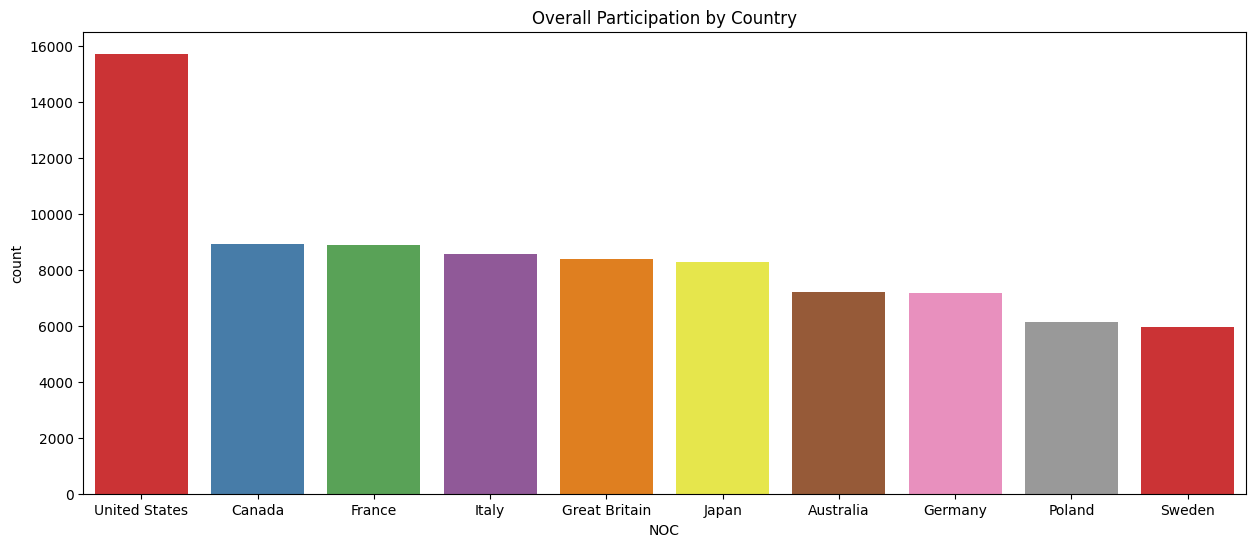

In [5]:
plt.figure(figsize=(15,6))
plt.title('Overall Participation by Country')
sns.barplot(x=top_10_countries.index, y=top_10_countries, palette = 'Set1')

As usual, we see USA has highest participation, almost double than Canada. China is in 11th position.

In [6]:
gender_counts = athletes.Sex.value_counts()
gender_counts

Sex
Male      152221
Female     75069
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x285ad6365d0>,
 [Text(0.5591170998419158, -0.9473056891333258, 'Male'),
  Text(-0.5591178602236616, 0.9473052403417359, 'Female')],
 [Text(0.30497296355013587, -0.5167121940727232, '66.97%'),
  Text(-0.3049733783038154, 0.5167119492773105, '33.03%')])

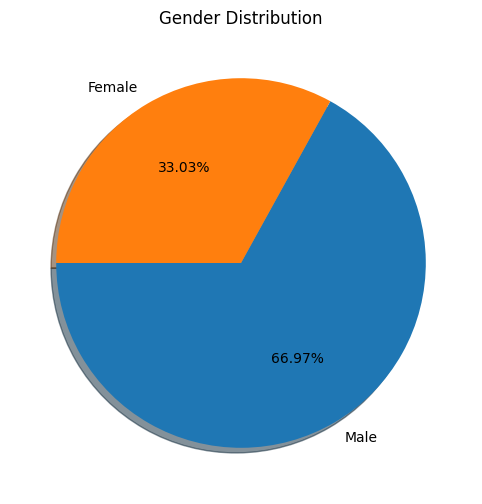

In [7]:
plt.figure(figsize=(12,6))
plt.title('Gender Distribution')
plt.pie(gender_counts, labels=gender_counts.index, autopct='%0.2f%%',startangle=180, shadow=True)

## Why are females only 1/3?

In [8]:
athletes.Medal.value_counts()

Medal
Gold      10991
Bronze    10919
Silver    10659
Name: count, dtype: int64

In [9]:
# Total number of female participants in each Olympics
female_participants = athletes[(athletes.Sex =='Female') & (athletes.Season == 'Summer')][['Sex','Year']]
female_participants = female_participants.groupby('Year').count().reset_index()
female_participants.head(15)

,Year,Sex
0,1920.0,1
1,1924.0,6
2,1928.0,63
3,1932.0,68
4,1936.0,99
5,1948.0,139
6,1952.0,410
7,1956.0,500
8,1960.0,1408
9,1964.0,1377


C:\Users\User\AppData\Local\Temp\ipykernel_29728\3616128722.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year', data=womenOlympics, palette='Spectral', order=sorted(womenOlympics['Year'].unique()))


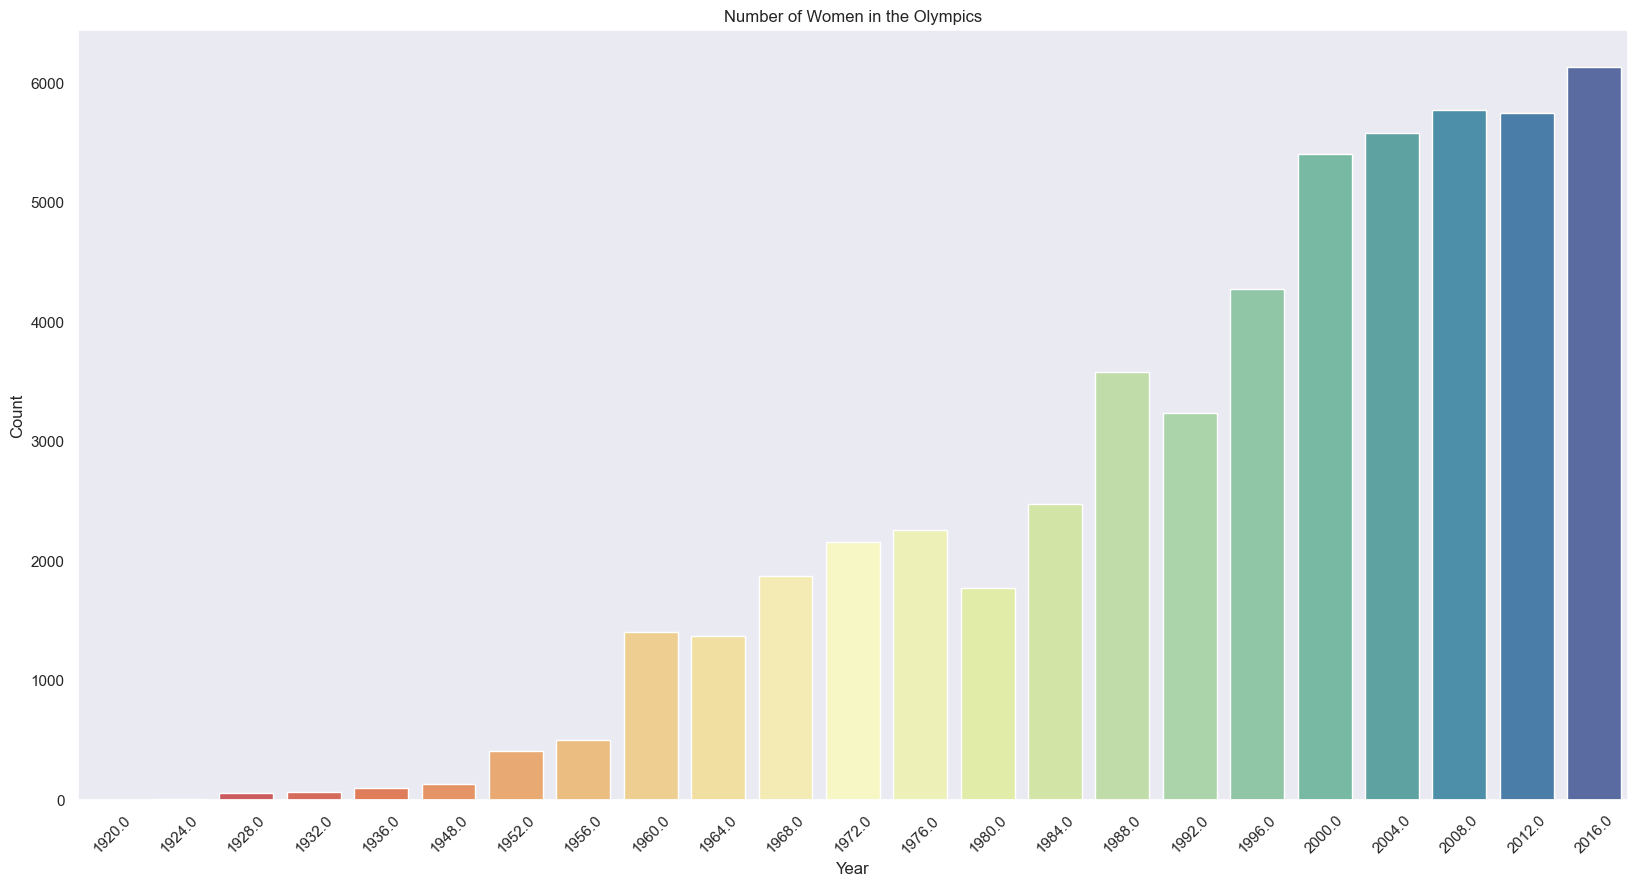

In [10]:
womenOlympics = athletes[
    (athletes['Sex'] == 'Female') & 
    (athletes['Season'] == 'Summer') & 
    (~athletes['Year'].isin([2010, 2014, 2018, 2020])) #wrong due to high NAN data
]

sns.set_theme(style='dark')
plt.figure(figsize=(20, 10))

sns.countplot(x='Year', data=womenOlympics, palette='Spectral', order=sorted(womenOlympics['Year'].unique()))

plt.title('Number of Women in the Olympics')
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation=45)

plt.show()


Thus we see women participants significantly increased from the 21st century.

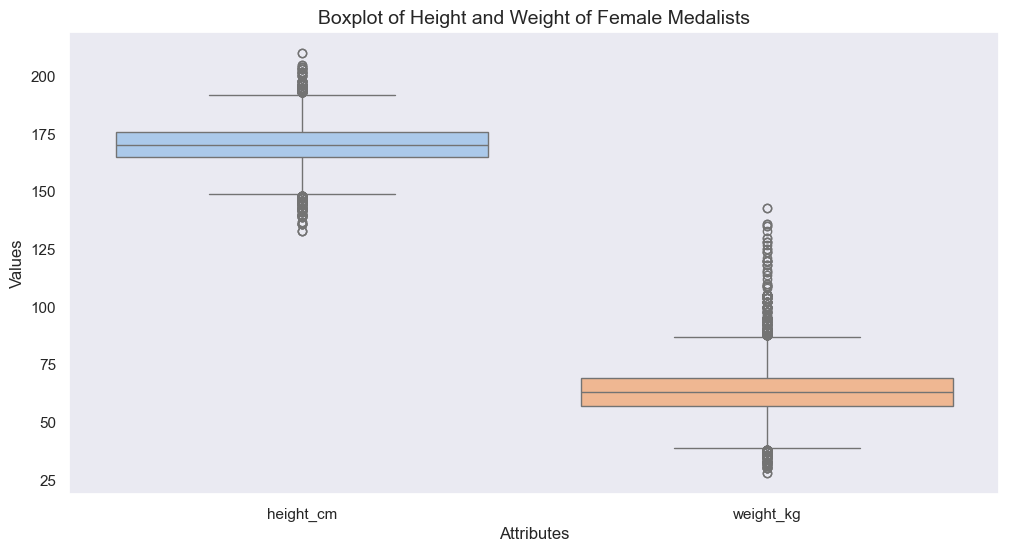

In [11]:
athletes['Sex'] = athletes['Sex'].str.upper()

female_medalists = athletes[(athletes['Sex'] == 'FEMALE') & (athletes['Medal'].notna())]

plt.figure(figsize=(12, 6))
sns.boxplot(data=female_medalists[['height_cm', 'weight_kg']], palette="pastel")

plt.title("Boxplot of Height and Weight of Female Medalists", fontsize=14)
plt.ylabel("Values")
plt.xlabel("Attributes")

plt.show()

It is seen that women with more height and less weight have a better chance at winning medals!

In [12]:
gold_medals = athletes[(athletes.Medal == 'Gold')]
gold_medals.shape

(10991, 17)

10991 gold medals!

In [13]:
gold_medals.tail(5)

,athlete_id,name,Sex,birth_year,born_city,born_country,NOC,height_cm,weight_kg,death_year,Event,Discipline,Year,Season,Medal,position,tied
227059,147736,Kim Bo-Eun,FEMALE,1997.0,NaN,NaN,Republic of Korea,176.0,65.0,NaN,"Handball, Gi",Handball,2014.0,Summer,Gold,1.0,False
227135,148311,Iiro Pakarinen,MALE,1991.0,Loviisa,FIN,Finland,185.0,96.0,NaN,"Ice Hockey, Men",Ice Hockey (Ice Hockey),2022.0,Winter,Gold,1.0,False
227215,148695,Vetle Sjåstad Christiansen,MALE,1992.0,Hønefoss,NOR,Norway,193.0,80.0,NaN,"4 × 7.5 kilometres Relay, Men",Biathlon,2022.0,Winter,Gold,1.0,False
227220,148696,Sturla Holm Lægreid,MALE,1997.0,Bærum,NOR,Norway,181.0,75.0,NaN,"4 × 7.5 kilometres Relay, Men",Biathlon,2022.0,Winter,Gold,1.0,False
227223,148716,Peder Kongshaug,MALE,2001.0,Wimbledon,GBR,Norway,184.0,86.0,NaN,"Team Pursuit (8 laps), Men",Speed Skating (Skating),2022.0,Winter,Gold,1.0,False


Last Gold in here is from 2022! He was just 21 years (just 1 year older than me)

In [14]:
gold_medal_athletes = athletes[(athletes["birth_year"] > 2000) & (athletes["Medal"] == "Gold")]

num_gold_athletes = gold_medal_athletes.shape[0]

num_gold_athletes

30

In [15]:
gold_medals.NOC.value_counts().reset_index(name='Medal').head(6)

,NOC,Medal
0,United States,2184
1,Soviet Union,853
2,Germany,482
3,People's Republic of China,418
4,Canada,417
5,Great Britain,365


C:\Users\User\AppData\Local\Temp\ipykernel_29728\3071710328.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Medal", y="NOC", data=noc_medal_data, palette="rocket")


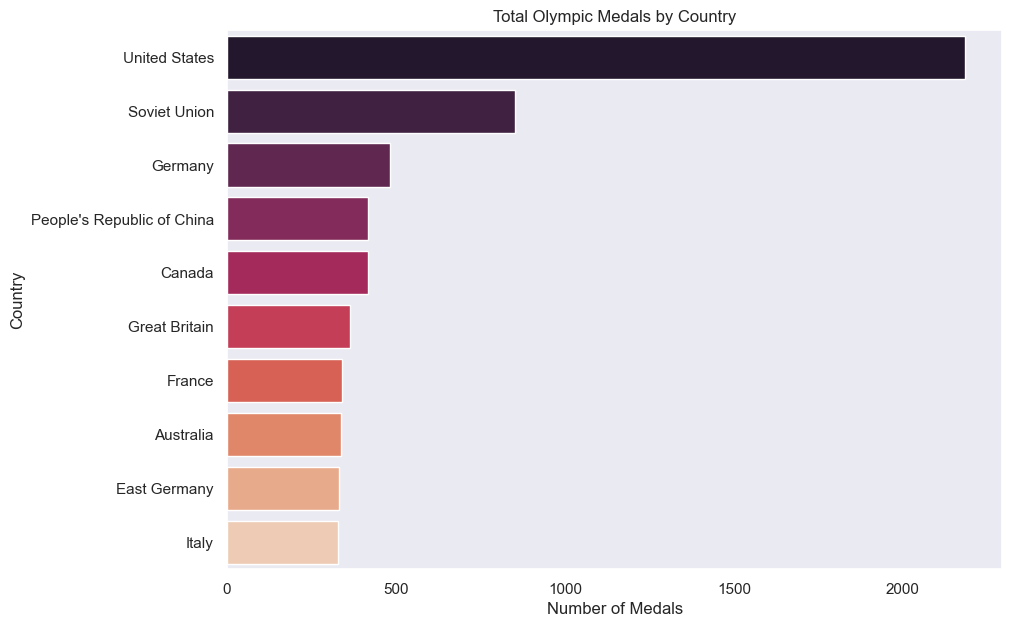

In [16]:

noc_medal_data = gold_medals.NOC.value_counts().reset_index(name='Medal').head(10)
plt.figure(figsize=(10, 7))
sns.barplot(x="Medal", y="NOC", data=noc_medal_data, palette="rocket")

plt.xlabel("Number of Medals")
plt.ylabel("Country")
plt.title("Total Olympic Medals by Country")

plt.show()

China is here in 4th position in medals whereas it was not even in top 10 most participants. Very high and effective conversion rate!

In [17]:
ind = athletes[(athletes["NOC"] == "India")]
ind.shape

(938, 17)

Shouout to all 938 Indian Participants!

In [18]:
max_year = athletes.Year.max()
print(max_year)

team_names = athletes[(athletes.Year == max_year) & (athletes.Medal == 'Gold')].Discipline
team_names.value_counts().head(10)

2022.0


Discipline
Ice Hockey (Ice Hockey)                23
Biathlon                               17
Speed Skating (Skating)                16
Short Track Speed Skating (Skating)    14
Alpine Skiing (Skiing)                 12
Cross Country Skiing (Skiing)          11
Snowboarding (Skiing)                  10
Freestyle Skiing (Skiing)               9
Ski Jumping (Skiing)                    8
Figure Skating (Skating)                5
Name: count, dtype: int64

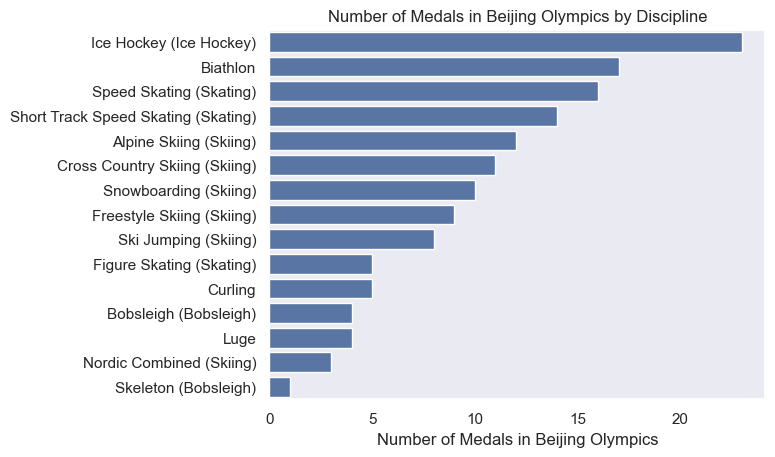

In [19]:
sns.barplot(x=team_names.value_counts().head(20), y=team_names.value_counts().head(20).index)
plt.xlabel('Number of Medals in Beijing Olympics')
plt.ylabel(None)
plt.title('Number of Medals in Beijing Olympics by Discipline')
plt.show()

Beijing Olympics was memorable!

Text(0.5, 1.0, 'Height vs Weight of Olympic Medalists')

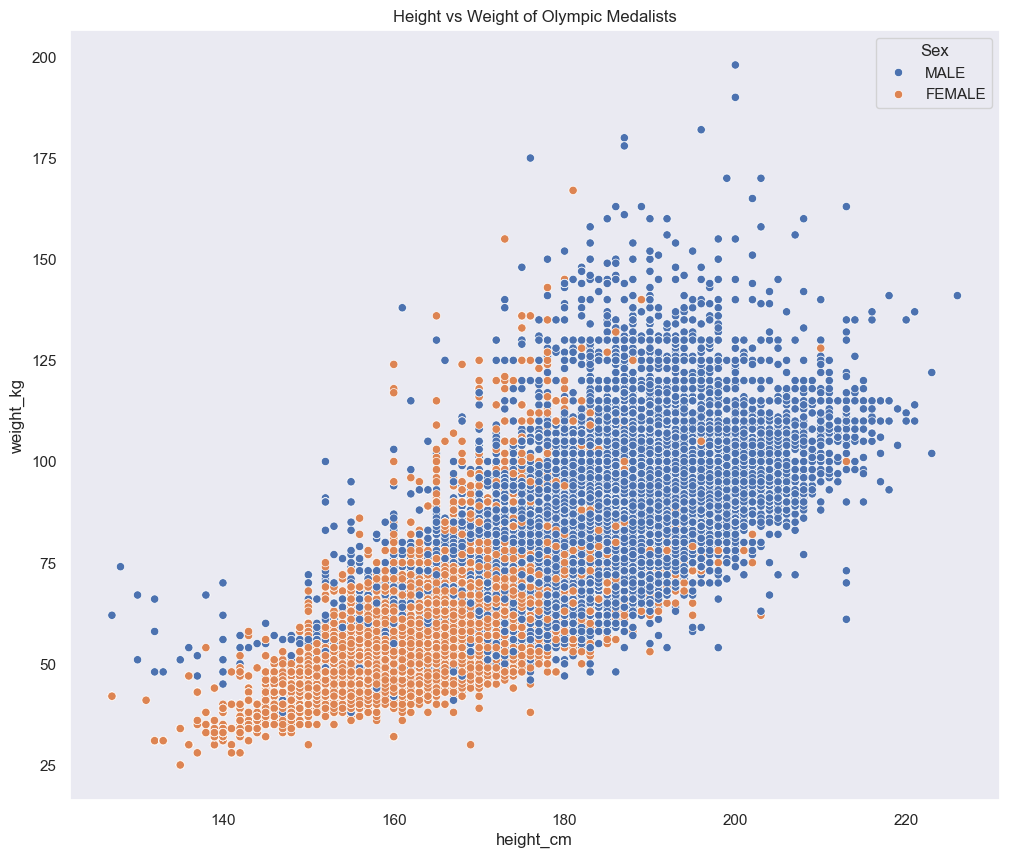

In [20]:
not_null_medals = athletes[(athletes['height_cm'].notnull()) & athletes['weight_kg'].notnull()]
plt.figure(figsize=(12,10))
sns.scatterplot(x="height_cm", y="weight_kg", data=not_null_medals, hue='Sex')
plt.title('Height vs Weight of Olympic Medalists')

This shows the physical dominance in male and exactly why trans participation in female events should not be allowed.

In [21]:
#Some more Statistical Analysis on Olympic Data

# Descriptive statistics for height and weight of medalists vs. non-medalists
medalists = athletes[athletes['Medal'].notna()]
non_medalists = athletes[athletes['Medal'].isna()]

medalists_stats = medalists[['height_cm', 'weight_kg']].describe()
non_medalists_stats = non_medalists[['height_cm', 'weight_kg']].describe()

# Trend of medals awarded over the years
medals_per_year = athletes[athletes['Medal'].notna()].groupby('Year').size()

print("1. Medal Distribution")
print(medal_counts, "\n")

print("2. Physical Attributes of Medalists vs. Non-Medalists")
print("Medalists Stats:\n", medalists_stats, "\n")
print("Non-Medalists Stats:\n", non_medalists_stats, "\n")

print("4. Trends Over Time")
print(medals_per_year.head(10))


1. Medal Distribution


NameError: name 'medal_counts' is not defined

- Attribute	Medalists (Avg.)	|Non-Medalists (Avg.)|	Difference
- Height (cm)	177.5 cm	     |       175.0 cm	  |          +2.5 cm
- Weight (kg)	73.4 kg	          |      70.0 kg	   |             +3.4 kg